In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline   
import io

In [30]:
IceCream=pd.read_csv('IceCreamData.csv')

In [31]:
IceCream.head(4)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960


In [32]:
#finding null value in the data 
IceCream.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [33]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [34]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Visualize Dataset

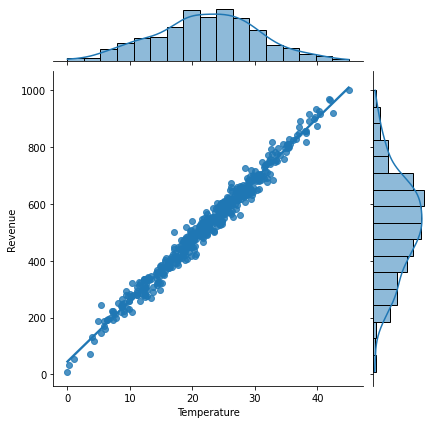

In [35]:
sns.jointplot(x='Temperature',y='Revenue',data=IceCream,kind='reg')
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

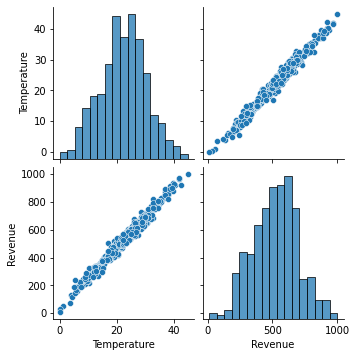

In [36]:
sns.pairplot(IceCream)

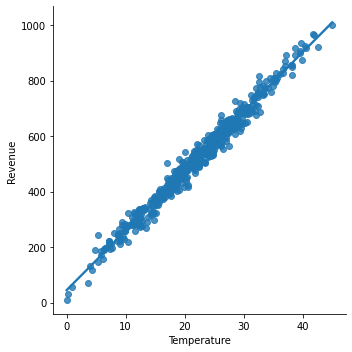

In [37]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='Temperature',y='Revenue',data=IceCream,)

# Create Testing and Training Dataset

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
x=IceCream[['Temperature']]
y=IceCream['Revenue']

In [40]:
x

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=0)

In [42]:
x_train

,Temperature
81,14.739551
401,38.628862
302,24.493477
499,28.957736
471,19.494743
...,...
323,22.870562
192,20.934608
117,29.312013
47,30.635307


In [43]:
x_test

,Temperature
90,30.427792
254,28.335363
283,28.865589
445,18.908489
461,28.900192
...,...
278,33.744209
225,21.540459
64,20.511637
381,17.871199


In [44]:
x_train.shape

(335, 1)

In [45]:
x_test.shape

(165, 1)

In [46]:
y_train.shape

(335,)

In [47]:
y_test.shape

(165,)

# Train the Model

In [48]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(x,y)

LinearRegression()

In [49]:
print('Linear Model Coefficent (m)',regressor.coef_)
print('Linear Model Coefficent (b)',regressor.intercept_)

Linear Model Coefficent (m) [21.44362551]
Linear Model Coefficent (b) 44.83126709056353


In [50]:
 y_pred = regressor.intercept_ + regressor.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
     Temperature
0     571.634337
1     602.476847
2     640.761497
3     486.469919
4     291.507963
..           ...
495   522.485865
496   750.178416
497   314.766991
498   524.362249
499   665.790120

[500 rows x 1 columns]


In [51]:
# regression=LinearRegression(fit_intercept=False)
# regression.fit(X_train,y_train)
# print('Linear Model Coefficent (m)',regression.coef_)
# print('Linear Model Coefficent (b)',regression.intercept_)

# Test the Model

In [52]:
x_test.shape

(165, 1)

In [53]:
x_train.shape

(335, 1)

In [54]:
#This is the dolar(revenue prediction)
y_predict=regressor.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict.squeeze()})
print(df_preds)

         Actual   Predicted
90   704.281439  697.313440
254  632.901914  652.444175
283  662.558990  663.814147
445  449.813300  450.297817
461  636.298374  664.556156
..          ...         ...
278  797.566536  768.429442
225  528.116240  506.736804
64   498.757050  484.675138
381  440.677829  428.054567
231  449.112869  476.992056

[165 rows x 2 columns]


In [55]:
y_test

90     704.281439
254    632.901914
283    662.558990
445    449.813300
461    636.298374
          ...    
278    797.566536
225    528.116240
64     498.757050
381    440.677829
231    449.112869
Name: Revenue, Length: 165, dtype: float64

InvalidIndexError: (slice(None, None, None), None)

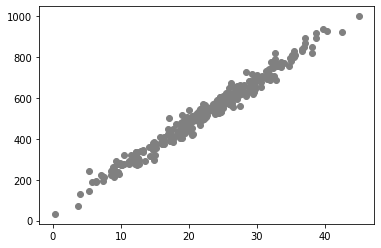

In [56]:
plt.scatter(x_train,y_train,color='gray')
plt.plot(x_train,regressor.predict(x_train),color='red')
# plt.plot(X_train, y_train_predict, color = 'blue')
plt.title('Revenue Generated (Training Test)')
plt.xlabel('Temperature[DegC]')
plt.ylabel('Revenue[Dollar]')
plt.show()


In [ ]:
regressor.score(x_train,y_train)

In [ ]:
regressor.score(x_test,y_test)